<table>
    <tr>
        <td><img src="./imagenes/Macc.png" width="400"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="color:blue;text-align:left">Inteligencia Artificial</h1></td>
        <td>
            <table><tr>
            <tp><p style="font-size:150%;text-align:center">Notebook</p></tp>
                <tp><p style="font-size:150%;text-align:center">Alejandro Vega y Juan Nicolás Sepúlveda</p></tp>
            <tp><p style="font-size:150%;text-align:center">Mini proyecto 2: Búsqueda en espacio de estados</p></tp>
            </tr></table>
        </td>
    </tr>
</table>

---

# Imports

In [1]:
from ambiente import Cubo
from busqueda import *
from tiempos import compara_funciones
from testSuits import test_suit_heuristicas_cubo

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy

Importamos el módulo ambiente del cual vamos a usar la clase `cubo` la cual sirve de ambiente para el problema de resolver un cubo de rubik 2x2 con la restricción de que solo puede mover la cara superior y la cara derecha.

Este cuenta con los siguientes métodos:


## Métodos usados en el problema:

* **pintar_estado_cmd():** muestra el estado actual del cubo en caracteres ascci. Ideal para visualización en consola.

    Los colores del cubo están codificados de la siguiente manera:
    
    * 0: blanco
    * 1: naranja
    * 2: verde
    * 3: rojo
    * 4: azul
    * 5: amarillo
    
    
* **pintar_estado():** muestra el estado actual del cubo con colores en una gráfica de matplotlib. Ideal para visualización en un notebook.


* **mezclar_cubo():** recibe una lista de acciones y la usa para mezclar el cubo o recibe un entero y le realiza esa cantidad de moviemientos aleatorios al cubo.


* **Métodos de giro:**
    - *giro_superior()*
    - *giro_superior_reves()*
    - *giro_superior_doble()*
    - *giro_derecho()*
    - *giro_derecho_reves()*
    - *giro_derecho_doble()*
    
    sirven para girar la cara indicada del cubo en sentido horario (o sentido anti-horario si es giro_cara_reves).
    También, un giro doble implica girar la cara en cuestión dos veces.
    
    
* **Métodos usados en la búsqueda:**

    - *test_objetivo:* Compara el estado actual con el estado objetivo y retorna si son iguales o no.
    - *acciones_aplicables:* retorna siempre lo mismo, todas las acciones que le podemos aplicar al cubo.
    - *transicion:* Toma un estado y una acción y retorna el estado obtenido al aplicar dicha acción.
    - *costo:* retorna `1`para cualquier accion que se realice sobre cualquier estado.
    - *codigo:* retorna la representacion como string de un estado del cubo.
    

## Métodos no usados en el problema:

* **Métodos de giro:**
    - *giro_frontal()*
    - *giro_frontal_reves()*
    - *giro_frontal_doble()*
    
    Tienen la misma funcionalidad que los otros métodos de giro mencionados anteriormente. 
    
    Estos método no se van a estar usando en la resolución del problema. esto por las restricciones que definimos al comienzo.

# Funcionamiento del entorno

###### Ahora vamos a revisar el funcionamiento de los métodos del ambiente.


Creamos un objeto de clase cubo, le pedimos que se mezcle usando 10 movimientos aleatorios, y que nos muestre los movimientos que usó para revolver el cubo. posteriormente imprimimos el estado del cubo.

Movimientos realizados para mezclar el cubo: ['arriba', 'arriba', '2frente', '2frente', 'frente', 'arriba', 'frente', '2frente', '!arriba', 'derecha']


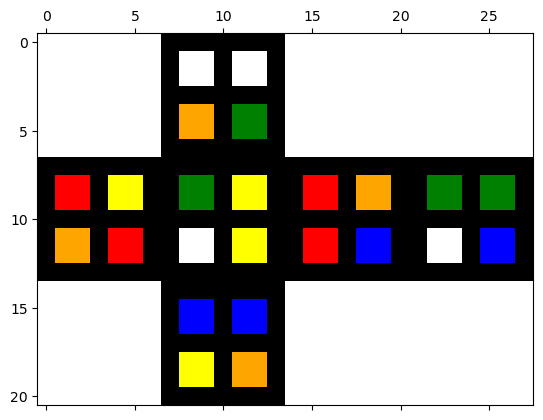

In [3]:
cubo = Cubo(num_movs=10, verbose=True, restriccion=False)
estado = cubo.estado_inicial
cubo.pintar_estado(estado)

También le podemos pasar una lista de movimientos para que mezcle el cubo.

Movimientos realizados para mezclar el cubo: ['arriba', '2frente', '2arriba', '2derecha', 'arriba']


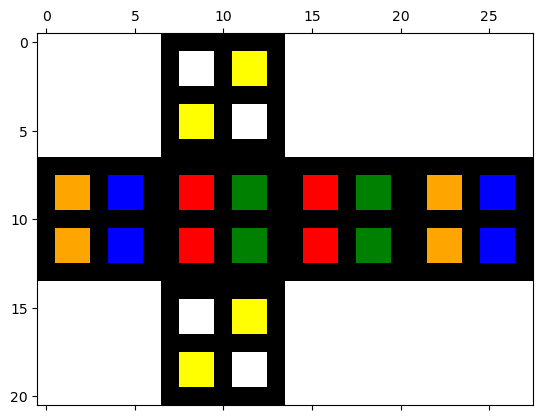

In [17]:
cubo = Cubo(verbose=True, restriccion=False, estado_inicial=['arriba', '2frente', '2arriba',
                                                                            '2derecha', 'arriba'])
estado = cubo.estado_inicial
cubo.pintar_estado(estado)

También podemos visualizar el estado objetivo del cubo.

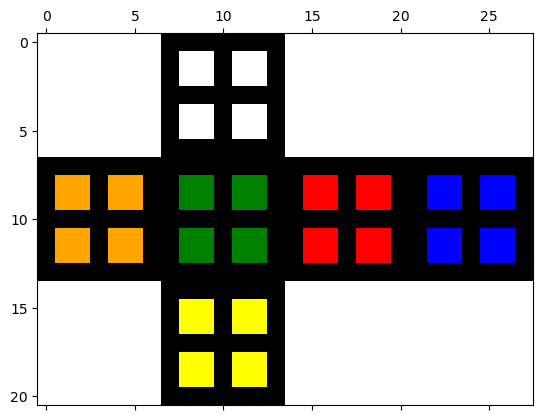

In [18]:
cubo.pintar_estado(cubo.estado_objetivo)

# Heurísticas para el problema


Para este problema se estarán usando dos heurísticas distintas, las cuales vamos a ver a continuación.

###### 1. Stickers mal puestos

En esta heurística se recorre cada cara del cubo y se cuenta cuántos stickers hay en esa cara cuyo color no corresponda al color de esa cara del cubo. Además, coloca una penalización extra si en esa cara hay un sticker del color opuesto a esa cara. donde:
    
* El blanco es opuesto al amarillo.
* El verde es opuesto al azul.
* El rojo es opuesto al naranja.

In [3]:
    def stickers_mal_puestos(self, estado):
        
        s = deepcopy(estado)
        
        opuestos = {0:5,
                    5:0,
                    1:3,
                    3:1,
                    2:4,
                    4:2}

        mal_puestas = 0
        for idx, cara in enumerate(s):
            mal_puestas += 4 - cara.count(idx)
            if opuestos[idx] in cara:
                mal_puestas += 1

        return mal_puestas

###### 2. Esquinas mal puestas

Esta heurística se diferencia de la anterior porque en este estamos teniendo en cuenta la estructura del cubo y estamos evaluando la posición de cada esquina (cubito) y contando la cantidad de esquinas que no están en su lugar.

In [4]:
def esquinas_mal_puestas(self, estado):

        s = deepcopy(estado)
        
        esquinas = [[0, 1, 4],
                    [0, 4, 3],
                    [0, 3, 2],
                    [0, 2, 1],
                    [2, 5, 1],
                    [3, 5, 2],
                    [4, 5, 3],
                    [1, 5, 4],]


        s_esquinas =   [[s[0][0], s[1][0], s[4][1]],
                        [s[0][1], s[4][0], s[3][1]],
                        [s[0][2], s[3][0], s[2][1]],
                        [s[0][3], s[2][0], s[1][1]],
                        [s[2][3], s[5][0], s[1][2]],
                        [s[3][3], s[5][1], s[2][2]],
                        [s[4][3], s[5][2], s[3][2]],
                        [s[1][3], s[5][3], s[4][2]],]
        
        bien_puestas = 0

        for i in range(8):
            if esquinas[i] == s_esquinas[i]:
                bien_puestas += 1

        return 8 - bien_puestas

# Pruebas

## Búsqueda a ciegas

vamos a empezar midiendo el tiempo promedio que le toma a los métdos de búsqueda a ciegas en encontrar una solución para el problema

Para evaluar los tiempos en cpu de los algotimos vamos a usar `compara_funciones()` del módulo tiempos.

***IMPORTANTE:*** Es ***MUY*** posible que al correr esta celda el notebook se congele y tenga

In [7]:
# Vamos a hacer experimentos en los cuales vamos a ir aumentando la cantidad de movimientos
# para revolver el cubo
max_movimientos = 2

for num in range(1, max_movimientos+1):
    prob = Cubo(num_movs=num)
    
    funs = [anchura,
        profundidad,
        lambda problema: backtracking(problema, Nodo(problema.estado_inicial, None, None, 0, problema.codigo(problema.estado_inicial)))]
    
    args = [[prob],[prob],[prob]]
    nombres = ['Primero en anchura', 
               'Primero en profundidad', 
               'Backtracking']
    
    data = compara_funciones(lista_funs=funs, 
                         lista_args=args, 
                         lista_nombres=nombres, 
                         num_it=10)
    
    print("============================================================")
    print(f"Resultados para num_moves = {num}\n")
    print(data.groupby('Función').agg({'tiempo_CPU':['mean', 'std']}))
    print()

Resultados para num_moves = 1

                       tiempo_CPU          
                             mean       std
Función                                    
Backtracking             0.000220  0.000017
Primero en anchura       0.000256  0.000080
Primero en profundidad   0.000242  0.000054

Resultados para num_moves = 2

                       tiempo_CPU          
                             mean       std
Función                                    
Backtracking             0.020072  0.002040
Primero en anchura       0.004154  0.001187
Primero en profundidad   0.001506  0.000248



<AxesSubplot:xlabel='Función', ylabel='tiempo_CPU'>

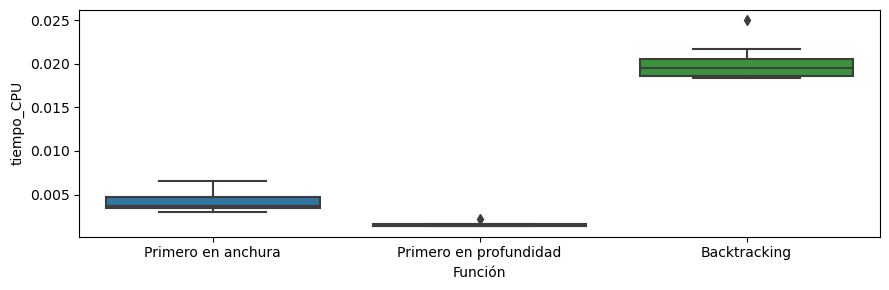

In [8]:
fig, ax = plt.subplots(1,1, figsize=(3*len(funs),3), tight_layout=True)
sns.boxplot(data=data, x='Función', y='tiempo_CPU')

Es evidente que hay un problema de maldición dimensionalidad aquí. al revolver el cubo con 4 o 5 movimientos, ya se presentan casos en los que los algoritmos se demoran una gran cantidad de tiempo en encontrar una respuesta.

## Búsqueda informada

###### Comparaciń de heurísticas

In [7]:
for num in range(1, 11):
    
    # Definimos la cantidad de movimientos a usar
    movimientos = [num]
    
    # Definimos las heurísticas
    heuristicas = [stickers_mal_puestos, esquinas_mal_puestas]
    nombres = ['stickers_mal_puestos', 'esquinas_mal_puestas']
    # Creamos el test suite
    
    lista_tests, lista_nombres = test_suit_heuristicas_cubo(movimientos, heuristicas, nombres)
    lista_funs = [avara]*len(lista_tests)
    
    
    data = compara_funciones(lista_funs=lista_funs, 
                         lista_args=lista_tests, 
                         lista_nombres=lista_nombres, 
                         num_it=10)
    
    print("============================================================")
    print(f"Resultados para num_moves = {num}\n")
    print(data.groupby('Función').agg({'tiempo_CPU':['mean', 'std']}))
    print()

0
stickers_mal_puestos
1
esquinas_mal_puestas
Resultados para num_moves = 1

                     tiempo_CPU          
                           mean       std
Función                                  
esquinas_mal_puestas   0.001014  0.000157
stickers_mal_puestos   0.000984  0.000178

0
stickers_mal_puestos
1
esquinas_mal_puestas
Resultados para num_moves = 2

                     tiempo_CPU          
                           mean       std
Función                                  
esquinas_mal_puestas   0.001961  0.000138
stickers_mal_puestos   0.001524  0.000251

0
stickers_mal_puestos
1
esquinas_mal_puestas
Resultados para num_moves = 3

                     tiempo_CPU          
                           mean       std
Función                                  
esquinas_mal_puestas   0.000960  0.000160
stickers_mal_puestos   0.000829  0.000127

0
stickers_mal_puestos
1
esquinas_mal_puestas
Resultados para num_moves = 4

                     tiempo_CPU          
                 

Se puede observar que aunque ambas heurísticas logran ayudar a encontrar una respuesta en un tiempo razonable, la heurística `esquinas_mal_puestas()` hace un trabajo mucho mejor.

Es muy probable que esto sea porque como mencionaba anteriormente, un cubo no está compuesto de stickers individuales, si no de piezas completas. Por lo que, por ejemplo, Es posible detectar que la cara superior está armada cuando no es así.

Veamos el siguiente ejemplo:

Movimientos realizados para mezclar el cubo: ['2derecha', '2frente', '2derecha', '2arriba']


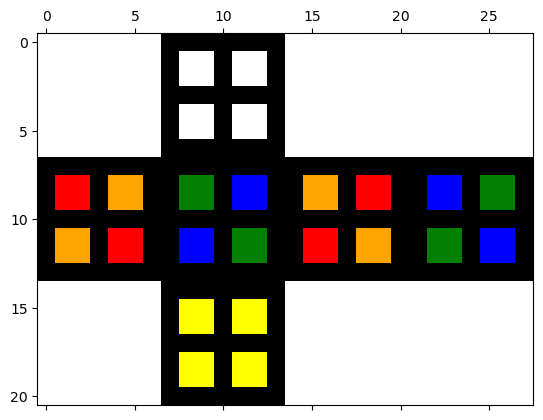

In [41]:
cubo = Cubo(verbose=True, restriccion=False, estado_inicial=['2derecha', '2frente', '2derecha',
                                                                            '2arriba'])
estado = cubo.estado_inicial
cubo.pintar_estado(estado)

En este caso, las caras blancas y amarillas están armadas. pero las esquinas no están en la posición correcta, por lo que la heurística reconocería erróneamente este caso como un caso "bueno" cuando en realidad puede que haya uno que tenga más esquinas en su lugar aunque tenga menos stickers en la posición correcta.

###### Comparación de algoritmos

In [47]:
verbose = True
tiempos_avara = []
std_avara = []
tiempos_A_star = []
std_A_star = []
num_movs = 20

for num in range(1, num_movs + 1):
    
    # Definimos la cantidad de movimientos a usar
    movimientos = [num]
    
    # Definimos las heurísticas
    heuristicas = [esquinas_mal_puestas]
    nombres = ['esquinas_mal_puestas']
    # Creamos el test suite
    
    lista_tests, lista_nombres = test_suit_heuristicas_cubo(movimientos, heuristicas, nombres)
    lista_funs = [avara]*len(lista_tests) + [lambda prob: A_star(prob, W=2.5)]*len(lista_tests)
#     print(lista_tests)
    lista_nombres = ['avara', 'A^*']
    lista_tests += lista_tests
    
    data = compara_funciones(lista_funs=lista_funs, 
                         lista_args=lista_tests, 
                         lista_nombres=lista_nombres, 
                         num_it=5)
    
    data = data.groupby('Función').agg({'tiempo_CPU':['mean', 'std']})
    tiempos_avara.append(data.iloc[0][0])
    std_avara.append(data.iloc[0][1])
    tiempos_A_star.append(data.iloc[1][0])
    std_A_star.append(data.iloc[1][1])
    
    if verbose:
        print("============================================================")
        print(f"Resultados para num_moves = {num}\n")
        print(data)
        print()

Resultados para num_moves = 1

        tiempo_CPU          
              mean       std
Función                     
A^*       0.000803  0.000026
avara     0.000838  0.000033

Resultados para num_moves = 2

        tiempo_CPU          
              mean       std
Función                     
A^*       0.000821  0.000053
avara     0.001446  0.000126

Resultados para num_moves = 3

        tiempo_CPU          
              mean       std
Función                     
A^*       0.000766  0.000065
avara     0.000857  0.000114

Resultados para num_moves = 4

        tiempo_CPU          
              mean       std
Función                     
A^*       0.001243  0.000102
avara     0.000926  0.000281

Resultados para num_moves = 5

        tiempo_CPU          
              mean       std
Función                     
A^*       0.017063  0.000480
avara     0.220174  0.048839

Resultados para num_moves = 6

        tiempo_CPU          
              mean       std
Función                   

Vamos a visualizar los datos y comparar el rendimiento de ambos algoritmos.

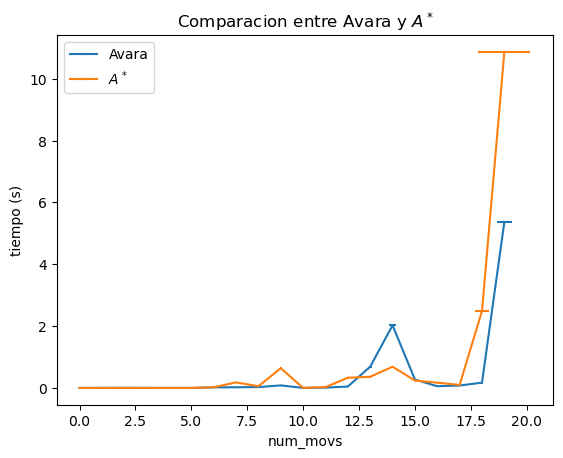

In [46]:
fig = plt.figure()

x = np.arange(num_movs)
y = tiempos_avara

plt.errorbar(x, y, xerr=std_avara, label='Avara')

y = tiempos_A_star
plt.errorbar(x, y, xerr=std_A_star, label='$A^*$')

plt.xlabel("num_movs")
plt.ylabel("tiempo (s)")
plt.title("Comparacion entre Avara y $A^*$")

plt.legend()
plt.show()


Se puede notar que aunque $A^*$ y Avara se comportan de manera similar en cuanto a tiempo. En algunos casos un poco más difíciles suele haber un algoritmo que se tarda mucho más en encontrar una respuesta que el otro, pero no hay un claro ganador. 

## Conclusiones

Para este problema resulta difícil presentar una tabla comparativa incluyendo los resultados con algorimos de búsqueda a ciegas, ya que la cantidad de nodos que tienen que visitar (especialmente para búsqueda en anchura) es muy grande. Lo que hace que el kernel muera antes de que se termine la ejecución. Sin embargo, tenemos los resultados y son claros: Las heurísticas ayudan a alivianar la maldición de la dimensionalidad.

Adicionalmente, encontramos que entre las dos heurísticas probadas, `esquinas_mal_puestas()` ayuda a reducir el tiempo de búsqueda en una medida mucho mayor. Esto porque trata al cubo como un solo ente y no como la unión de caras independientes entre sí.